In [1]:
import pandas as pd
import numpy as np
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline
# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve


UsageError: Line magic function `%` not found.


In [2]:
!pip install feature-engine

In [3]:
income=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\Python Scripts\income.csv')

In [4]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
income.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
income.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
categorical_col=income.select_dtypes(include="object")
categorical_col.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [9]:
numerical_cols = [feature for feature in income.columns if income[feature].dtypes!='object']
income[numerical_cols].sample(5)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
29797,32,119522,13,0,0,50
4223,18,152182,10,0,0,25
14347,29,19793,10,0,0,8
31676,43,105119,9,0,0,40
8643,42,175133,10,0,0,40


In [10]:
income.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

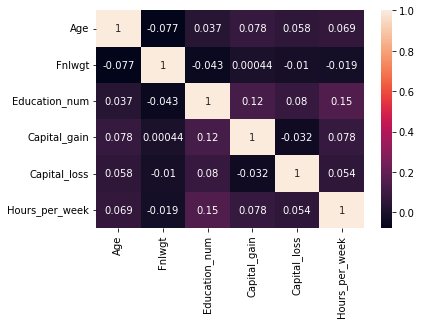

In [11]:
sns.heatmap(income.corr(),annot=True)

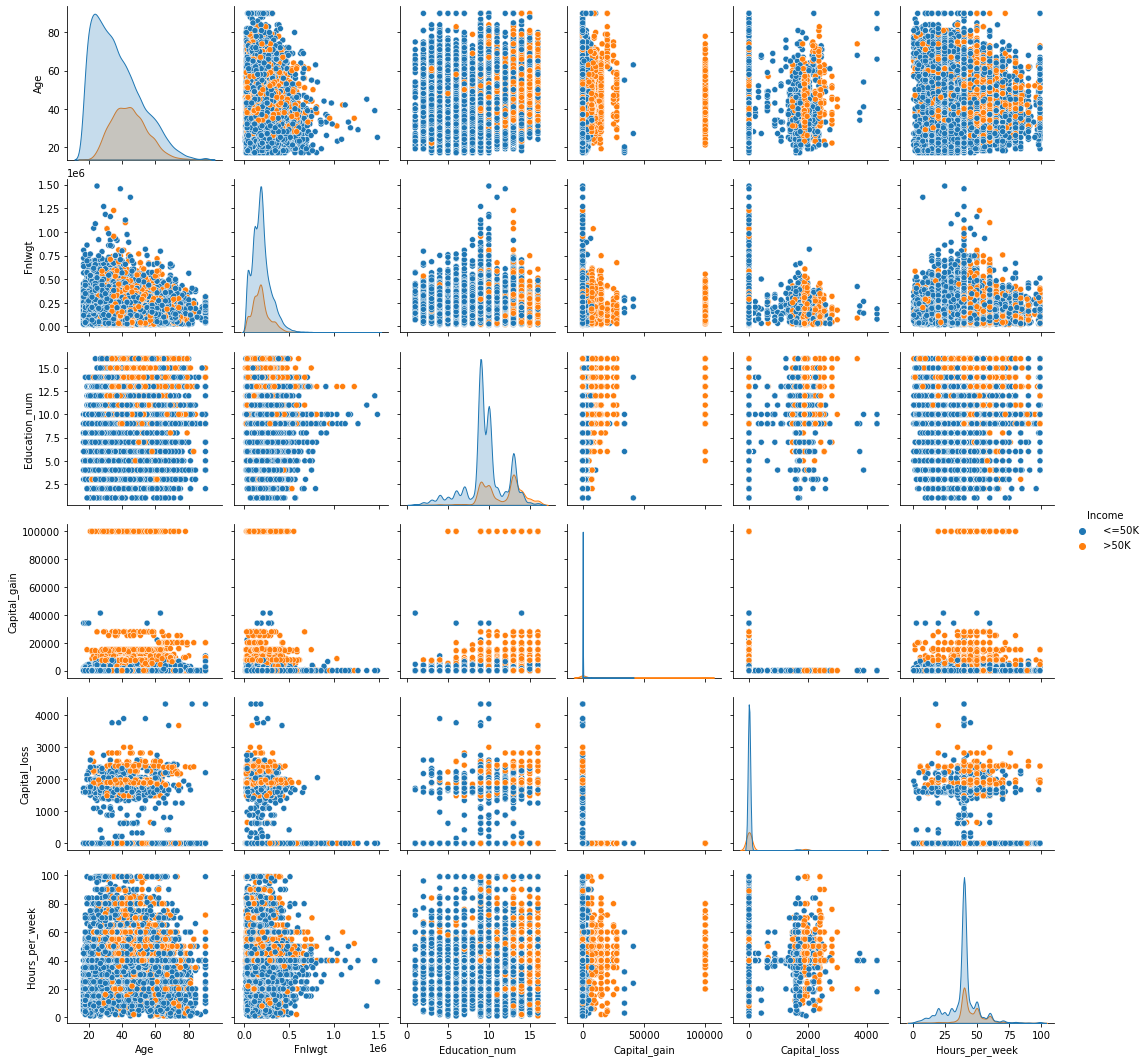

In [12]:
# pairplot of the datasets
sns.pairplot(income,hue='Income',diag_kind='kde')

# EDA - Exploratory Data Analysis


# Count Plot

income

In [ ]:
income['Income'].value_counts()

In [ ]:
sns.countplot(income['Income'],palette='twilight',data=income)

Sex

In [ ]:
income['Sex'].value_counts()

<AxesSubplot:xlabel='Sex', ylabel='count'>

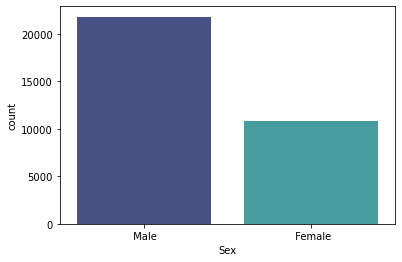

In [16]:
sns.countplot(income['Sex'],palette='mako',data=income)

Race

In [17]:
income['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

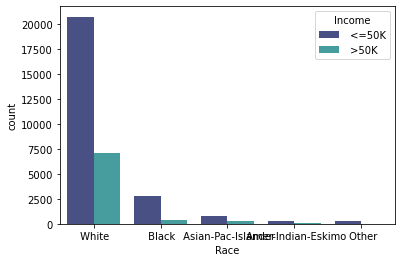

In [18]:
sns.countplot(income['Race'],palette='mako',hue='Income',data=income)

In [19]:
income['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

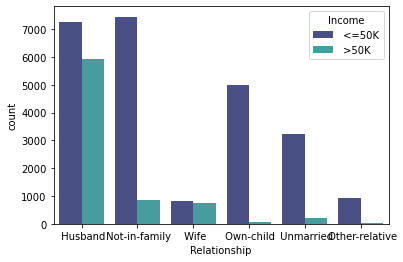

In [20]:
sns.countplot(income['Relationship'],palette='mako',hue='Income',data=income)

In [21]:
income['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [22]:
# repalcing the values with mode
income['Occupation'] = income['Occupation'].str.replace('?','Prof-specialty')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

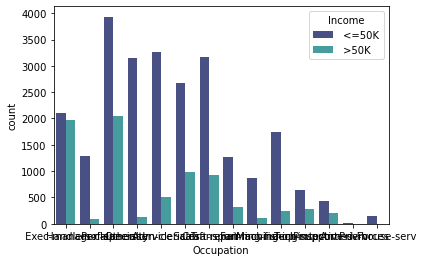

In [23]:
sns.countplot(income['Occupation'],palette='mako',hue='Income',data=income)

<AxesSubplot:xlabel='Race', ylabel='count'>

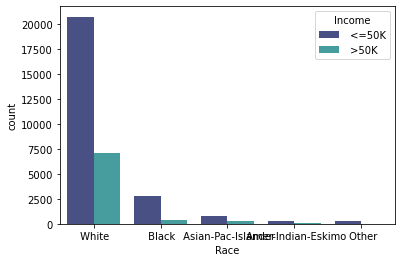

In [24]:
sns.countplot(income['Race'],palette='mako',hue='Income',data=income)

In [25]:
income['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

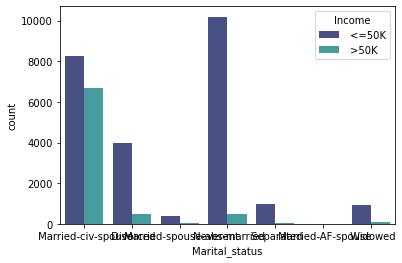

In [26]:
sns.countplot(income['Marital_status'],palette='mako',hue='Income',data=income)

In [27]:
income['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [28]:
# repalcing the values with mode
income['Workclass'] = income['Workclass'].str.replace('?','Private')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

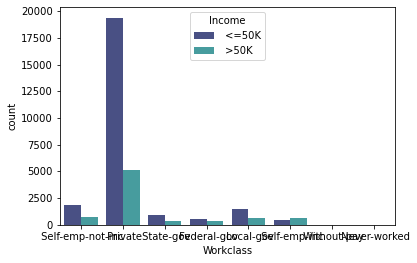

In [29]:
sns.countplot(income['Workclass'],palette='mako',hue='Income',data=income)

In [30]:
income['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [31]:
income['Native_country']=income['Native_country'].str.replace('?','United-States')

In [32]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [33]:
# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
income.Workclass = le.fit_transform(income.Workclass)
income.Education = le.fit_transform(income.Education)
income.Marital_status = le.fit_transform(income.Marital_status)
income.Occupation = le.fit_transform(income.Occupation)
income.Relationship = le.fit_transform(income.Relationship)
income.Race = le.fit_transform(income.Race)
income.Sex = le.fit_transform(income.Sex)
income.Native_country = le.fit_transform(income.Native_country)
income.Income = le.fit_transform(income.Income)

In [34]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [35]:
income.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# Distribution Plot

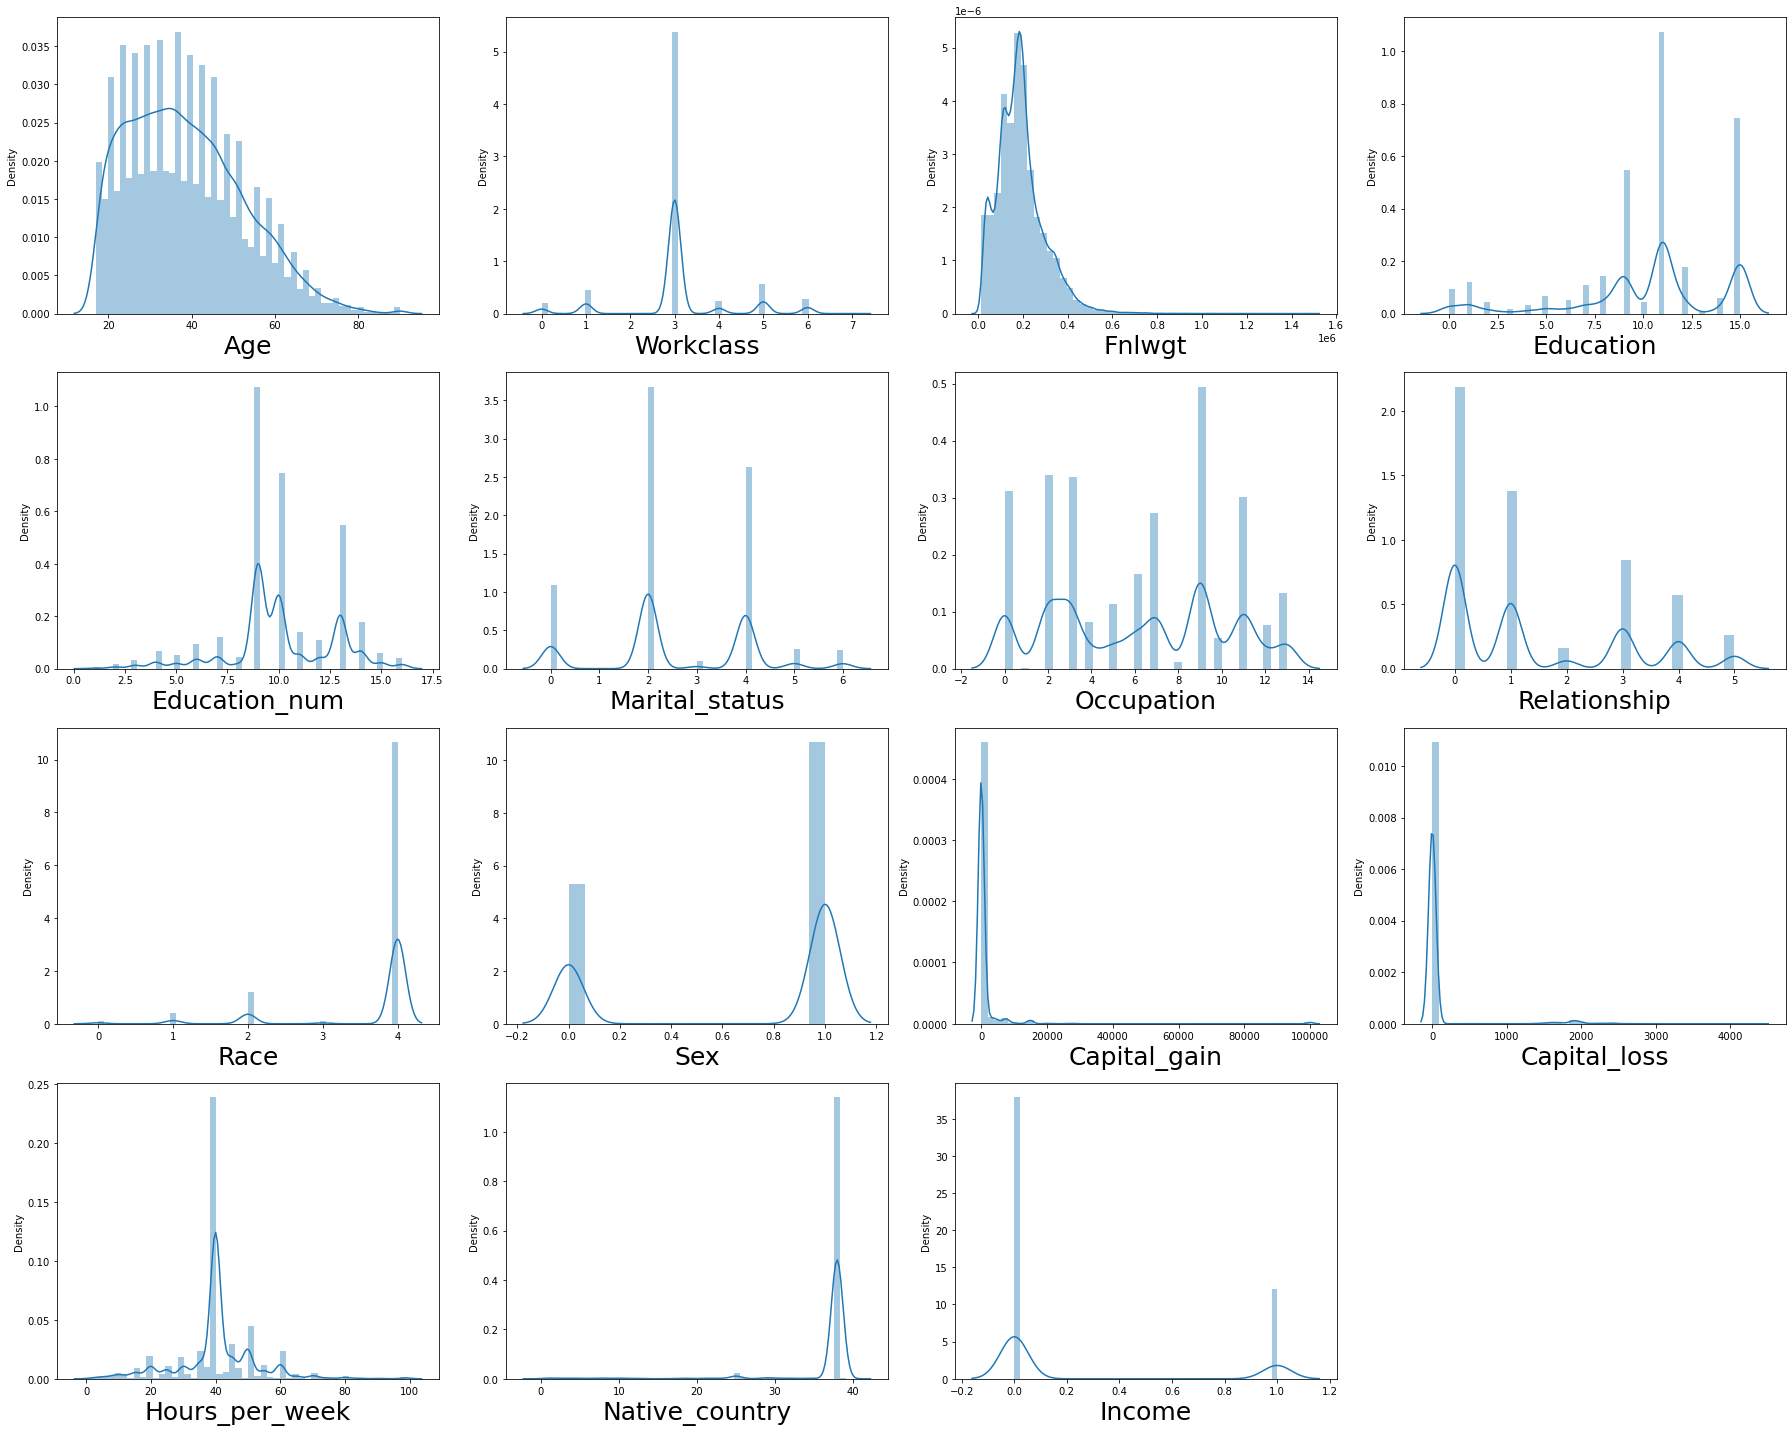

In [36]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in income:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(income[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.

# Replacing all the zero values from different columns

In [37]:
# Replacing categorial columns with mode
income['Workclass']=income['Workclass'].replace(0,income['Workclass'].mode()[0])
income['Education']=income['Education'].replace(0,income['Education'].mode()[0])
income['Marital_status']=income['Marital_status'].replace(0,income['Marital_status'].mode()[0])
income['Occupation']=income['Occupation'].replace(0,income['Occupation'].mode()[0])
income['Relationship']=income['Relationship'].replace(0,income['Relationship'].mode()[0])
income['Race']=income['Race'].replace(0,income['Race'].mode()[0])
income['Native_country']=income['Native_country'].replace(0,income['Native_country'].mode()[0])
income['Income']=income['Income'].replace(0,income['Income'].mode()[0])

According to the Dataset these 8 columns (Workclass,Education,Marital_status,Occupation,Relationship,Race,Native_country,Income) have zero values which i have replace it.

# BOX PLOT

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

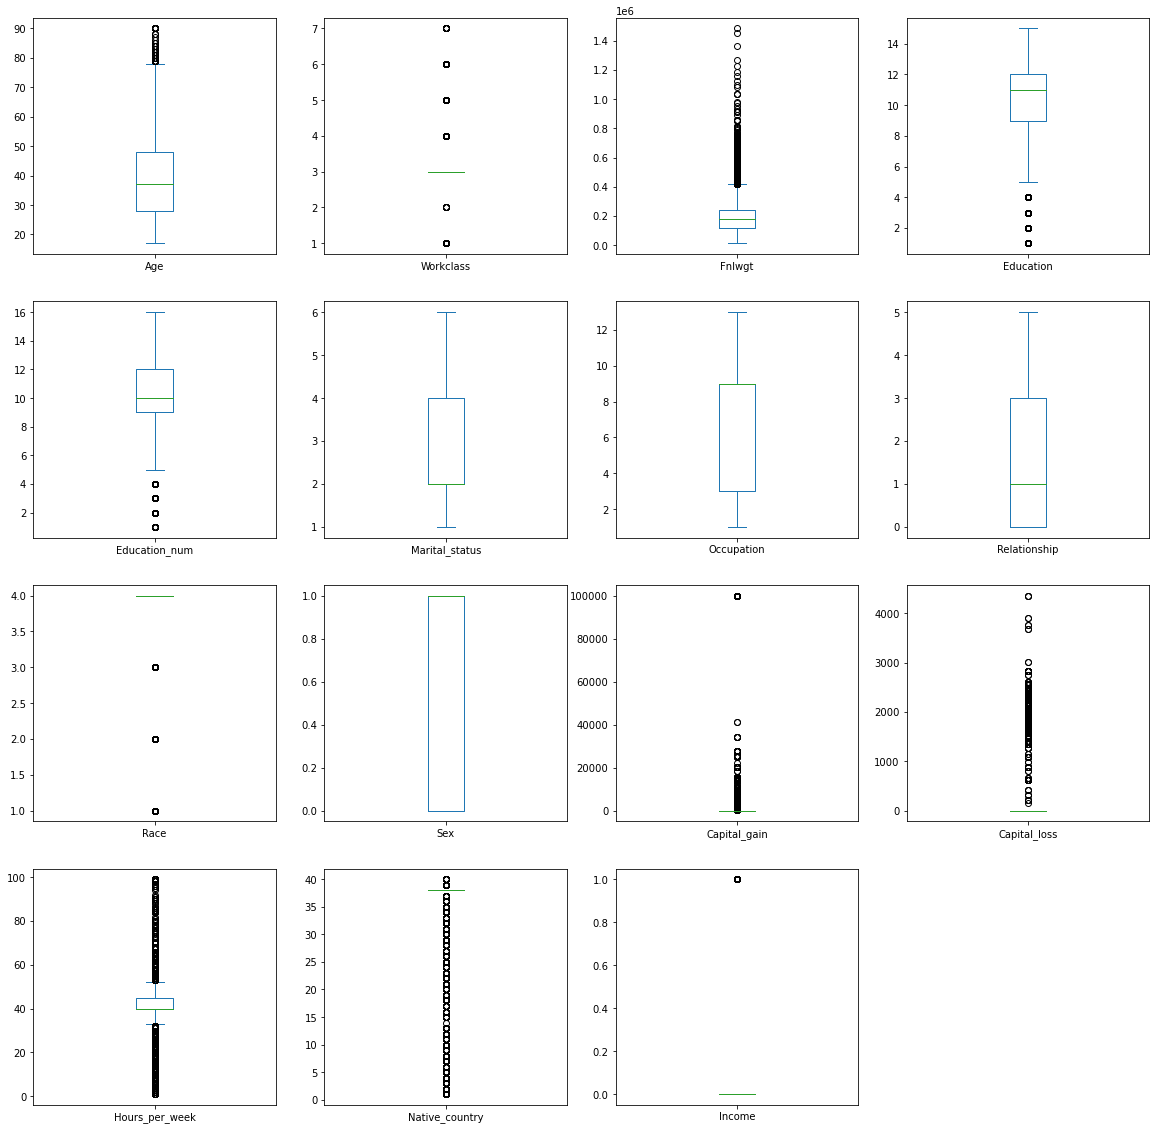

In [38]:
income.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

# Z-SCORE

In [39]:
from scipy.stats import zscore
z_score = zscore(income[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week','Native_country']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
income =income[filtering_entry]
income.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000,29014.000000
mean,38.151892,3.174502,185017.090922,10.632281,10.034363,2.901289,7.184152,1.475598,3.717205,0.662025,568.625146,1.205659,39.895223,37.422003,0.222134
std,13.382396,0.965248,94772.502335,3.454216,2.493591,1.146271,3.359774,1.607704,0.748225,0.473028,2328.015458,32.542532,11.153614,2.660872,0.415688
min,17.000000,1.000000,12285.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,117258.000000,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177461.000000,11.000000,10.000000,2.000000,9.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234250.500000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,7.000000,506329.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i have used z score above to remove outliers.

# distribution plot

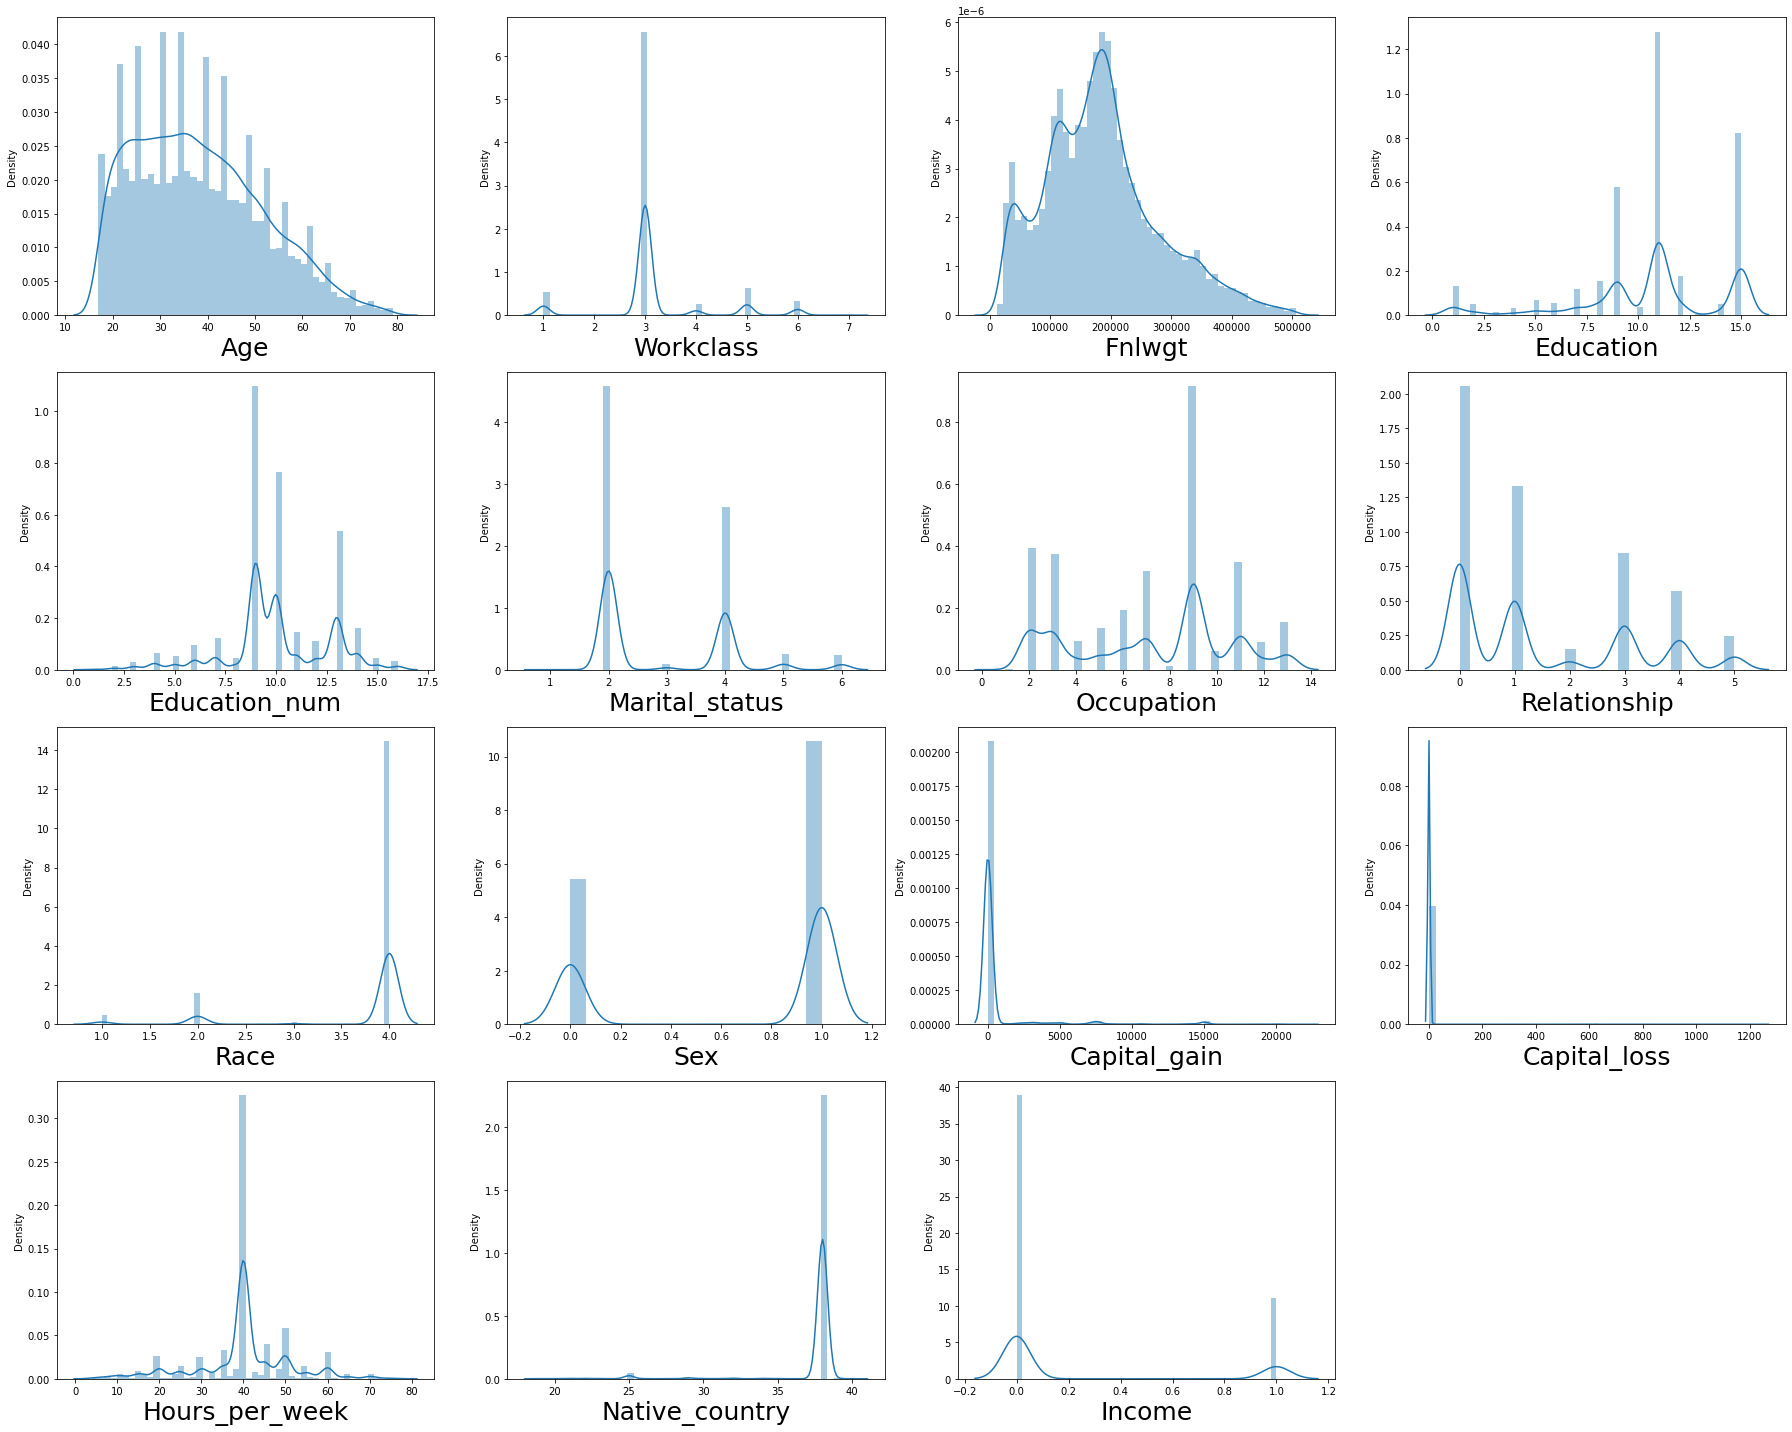

In [40]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in income:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(income[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

# split the data

In [41]:
# dividing features and label

x = income.drop('Income',axis=1)
y = income.Income

# STANDARD SCALAR

In [42]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scal=scalar.fit_transform(x)
scal

array([[ 0.88536549,  1.89125517, -1.07317884, ..., -0.03704936,
        -2.41138754,  0.21722458],
       [-0.01135034, -0.18078778,  0.32318907, ..., -0.03704936,
         0.00939416,  0.21722458],
       [ 1.10954445, -0.18078778,  0.524464  , ..., -0.03704936,
         0.00939416,  0.21722458],
       ...,
       [ 1.48317605, -0.18078778, -0.34933826, ..., -0.03704936,
         0.00939416,  0.21722458],
       [-1.20697146, -0.18078778,  0.17381828, ..., -0.03704936,
        -1.78377747,  0.21722458],
       [ 1.03481813,  0.85523369,  1.08588124, ..., -0.03704936,
         0.00939416,  0.21722458]])

# VIF-VARIANCE INFLATION FACTOR

In [43]:
# finding variance inflation factor(vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scal,i) for i in range (scal.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.167678,Age
1,1.015558,Workclass
2,1.020223,Fnlwgt
3,1.076072,Education
4,1.153528,Education_num
5,1.277531,Marital_status
6,1.049963,Occupation
7,1.706464,Relationship
8,1.040880,Race
9,1.591405,Sex


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scal,y,test_size=0.25,random_state=370)

# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)

In [46]:
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve


cfm = confusion_matrix(y_test,pred_y)
cfm

array([[5322,  307],
       [ 870,  755]], dtype=int64)

In [47]:
lr.score(x_test,y_test)

0.8377446925834022

In [48]:
accuracy = accuracy_score(y_test,pred_y)
accuracy

0.8377446925834022

In [49]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5629
           1       0.71      0.46      0.56      1625

    accuracy                           0.84      7254
   macro avg       0.79      0.71      0.73      7254
weighted avg       0.83      0.84      0.82      7254



Below is the Auc Score:

In [50]:
# Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7050381950612897

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# KNN MODEL

In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_y=knn.predict(x_test)

In [53]:
cfm=confusion_matrix(y_test,pred_y)
cfm

array([[5123,  506],
       [ 693,  932]], dtype=int64)

In [54]:
knn.score(x_test,y_test)

0.8347118830989799

In [55]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.8347118830989799

In [56]:
print(classification_report(y_test,pred_y,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5629
           1       0.65      0.57      0.61      1625

    accuracy                           0.83      7254
   macro avg       0.76      0.74      0.75      7254
weighted avg       0.83      0.83      0.83      7254



# GRIDSEARCH CV

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [58]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)


In [59]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [61]:
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]}

SyntaxError: unexpected EOF while parsing (1938852527.py, line 3)

In [62]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [63]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [64]:
pred_y=knn.predict(x_test)

In [65]:
cfm=confusion_matrix(y_test,pred_y)
cfm

array([[5127,  502],
       [ 704,  921]], dtype=int64)

In [68]:
knn.score(x_train,y_train)

0.8757352941176471

In [69]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.8337468982630273

# RANDON FOREST CLASSIFIER

In [70]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_y=rfc.predict(x_test)

In [71]:
cfm=confusion_matrix(y_test,pred_y)
cfm

array([[5266,  363],
       [ 694,  931]], dtype=int64)

In [72]:
rfc.score(x_train,y_train)

0.9999540441176471

In [73]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.8542872897711608

In [74]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5629
           1       0.72      0.57      0.64      1625

    accuracy                           0.85      7254
   macro avg       0.80      0.75      0.77      7254
weighted avg       0.85      0.85      0.85      7254



# GRID SEARCH CV

In [75]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [76]:
rfc = grd.best_estimator_

In [77]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [78]:
pred_y=rfc.predict(x_test)

In [79]:
cfm=confusion_matrix(y_test,pred_y)
cfm

array([[5427,  202],
       [ 830,  795]], dtype=int64)

In [80]:
rfc.score(x_train,y_train)

0.8616727941176471

In [81]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.8577336641852771

In [82]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5629
           1       0.80      0.49      0.61      1625

    accuracy                           0.86      7254
   macro avg       0.83      0.73      0.76      7254
weighted avg       0.85      0.86      0.84      7254



In [83]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7266725883815953

# DECISION TREE CLASSIFIER

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_y=dt.predict(x_test)

In [90]:
cfm=confusion_matrix(y_test,pred_y)
cfm

array([[4901,  728],
       [ 705,  920]], dtype=int64)

In [91]:
dt.score(x_train,y_train)

0.9999540441176471

In [92]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.8024538185828508

In [93]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5629
           1       0.56      0.57      0.56      1625

    accuracy                           0.80      7254
   macro avg       0.72      0.72      0.72      7254
weighted avg       0.80      0.80      0.80      7254



# GRID SEARCH CV

In [94]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [95]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [97]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [98]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=7,min_samples_split=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [99]:
pred_y = dt.predict(x_test)

In [100]:
cfm = confusion_matrix(y_test,pred_y)
cfm

array([[5426,  203],
       [ 849,  776]], dtype=int64)

In [101]:
dt.score(x_train,y_train)

0.8544117647058823

In [102]:
accuracy=accuracy_score(y_test,pred_y)
accuracy

0.854976564653984

In [103]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5629
           1       0.79      0.48      0.60      1625

    accuracy                           0.85      7254
   macro avg       0.83      0.72      0.75      7254
weighted avg       0.85      0.85      0.84      7254



In [104]:
# Decision Tree Classifier
roc_auc_score(y_test,dt.predict(x_test))

0.7207376088115117

# Roc_Auc Curve

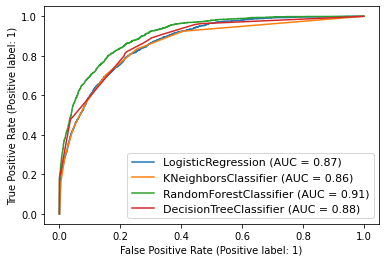

In [105]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()


# Summary:
ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.¶
ROC curves are appropriate when the observations are balanced or not.
According to my Roc_Auc Curve I can say that RandomForestClassifier with 90% is the best predictive model in this Dataset.

# SAVE THE MODEL

In [106]:
import pickle
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))